In [43]:
import pickle

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
zero_counts = (data == 0).sum()
print("Count of '0' values in each column:")
print(zero_counts)

Count of '0' values in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


a zero in 'glucose', 'BloodPressue', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', and 'Age' doesn't make sense, so those must indicate a missing value. So, replacing those values with NULL

In [6]:
data = pd.read_csv('diabetes.csv')

# Define the columns in which you want to replace '0' with NaN
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace '0' with NaN in the selected columns
data[columns_to_replace] = data[columns_to_replace].replace(0, pd.NA)

# Display the modified DataFrame
zero_counts = (data == 0).sum()
print("Count of '0' values in each column:")
print(zero_counts)

Count of '0' values in each column:
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


Replacing those NULLS with the mean of those respoective columns

In [7]:
columns_to_fill = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']

# Replace NaN values with mean for the selected columns
data[columns_to_fill] = data[columns_to_fill].fillna(data[columns_to_fill].mean())

<h2 style="font-size: 24px;">DATA VISUALISATION</h2>

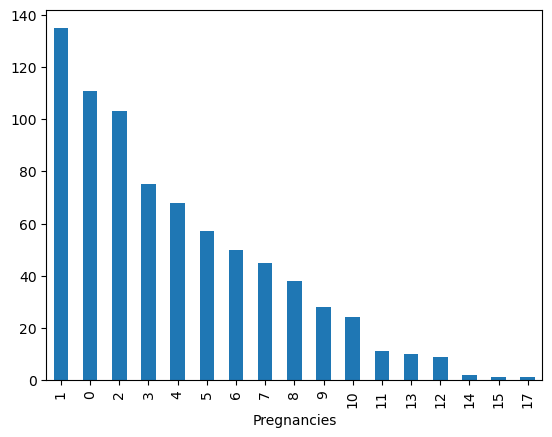

In [8]:
data.Pregnancies.value_counts().plot(kind='bar');

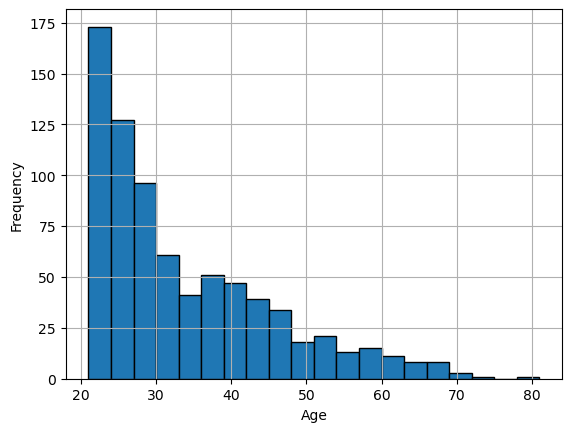

In [9]:
data['Age'].plot(kind='hist', bins=20, edgecolor='black')  # Histogram for age distribution
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

From the above graph, we can see that the data we have mostly consists of people aged between 20-40

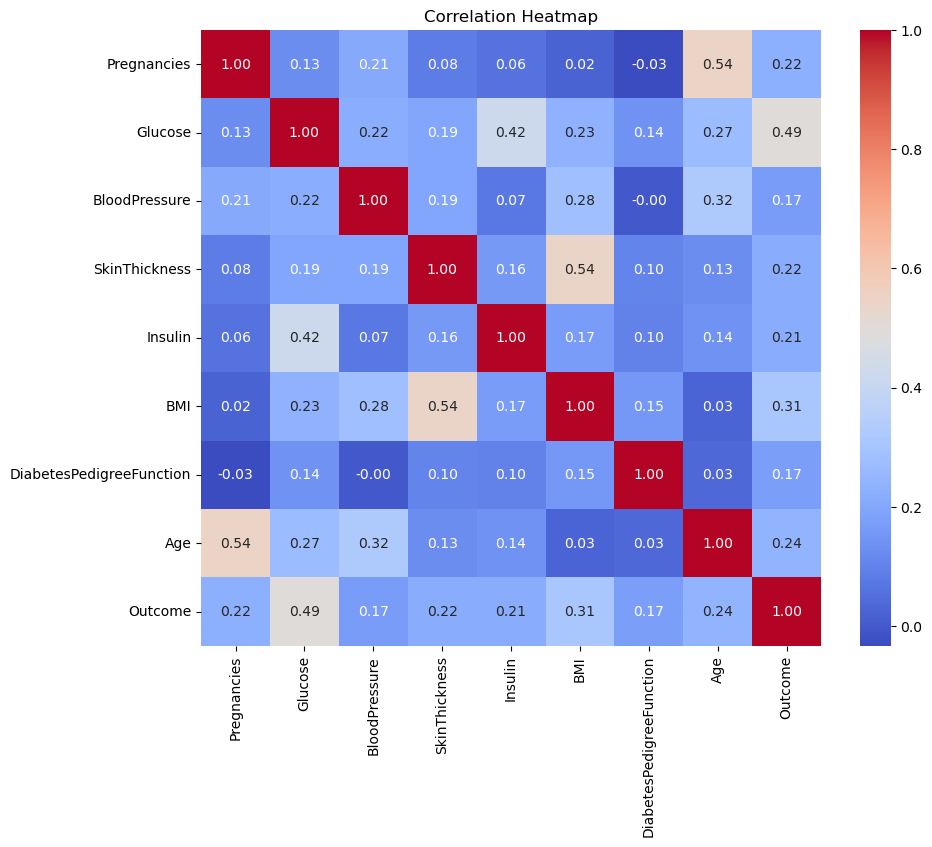

In [10]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

correlation_matrix = data[columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

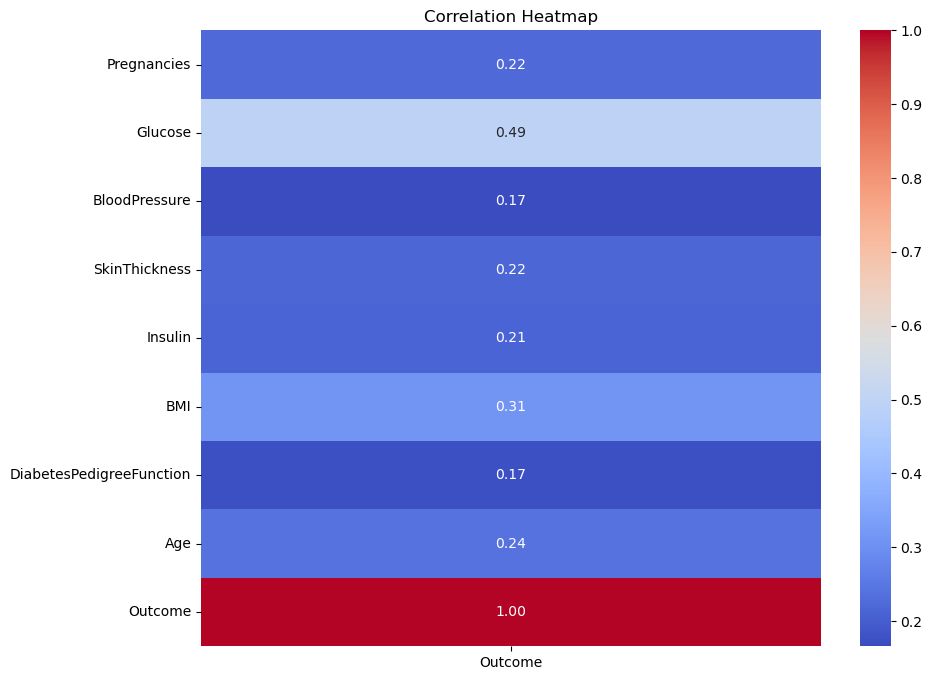

In [11]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['Outcome']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

So, glucose is the most affecting attribute here. And DiabetesPedigreeFunction is the least

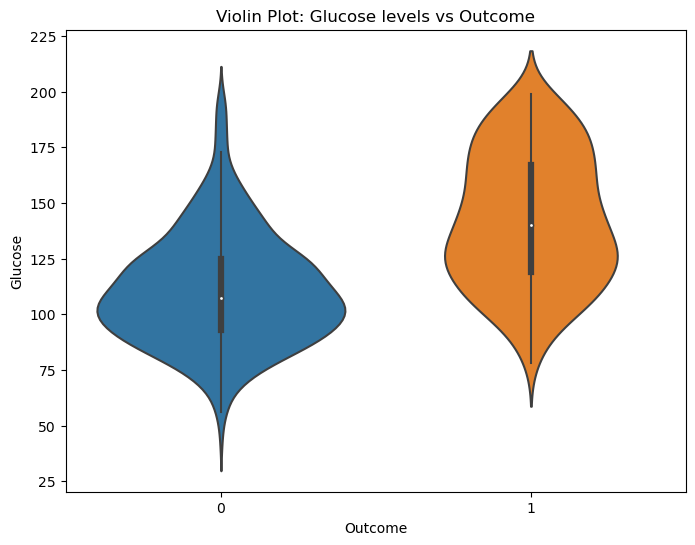

In [12]:
plt.figure(figsize=(8, 6))

sns.violinplot(x='Outcome', y='Glucose', data=data)
plt.title('Violin Plot: Glucose levels vs Outcome')
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

In [13]:
scaler = StandardScaler()
data_copy = data
X =  pd.DataFrame(scaler.fit_transform(data_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [14]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


<h2 style="font-size: 24px;">LOGISTIC REGRESSION</h2>

In [34]:
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
model = LogisticRegression(max_iter=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('mae: ',mae)
print('mse: ',mse)
print('accuracy: ',accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

mae:  0.22727272727272727
mse:  0.22727272727272727
accuracy:  0.7727272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       211
           1       0.65      0.62      0.63        97

    accuracy                           0.77       308
   macro avg       0.74      0.73      0.73       308
weighted avg       0.77      0.77      0.77       308

Confusion Matrix:
[[178  33]
 [ 37  60]]


Text(0.5, 23.52222222222222, 'Predicted label')

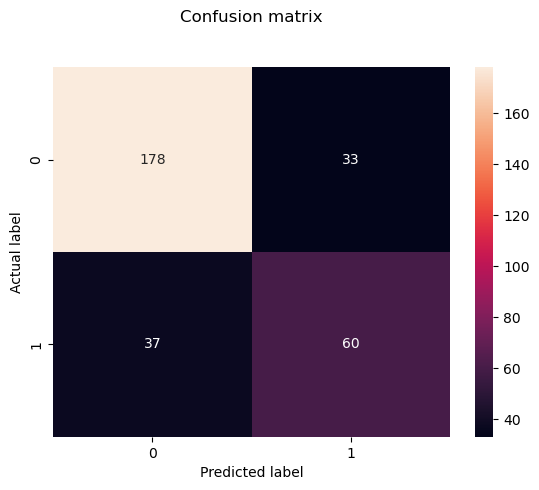

In [35]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h2 style="font-size: 24px;">RANDOM FOREST</h2>

In [36]:
X_copy = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.4)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('mae: ',mae)
print('mse: ',mse)
print('accuracy: ',accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

mae:  0.22727272727272727
mse:  0.22727272727272727
accuracy:  0.7727272727272727
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       201
           1       0.68      0.64      0.66       107

    accuracy                           0.77       308
   macro avg       0.75      0.74      0.75       308
weighted avg       0.77      0.77      0.77       308

Confusion Matrix:
[[169  32]
 [ 38  69]]


Text(0.5, 23.52222222222222, 'Predicted label')

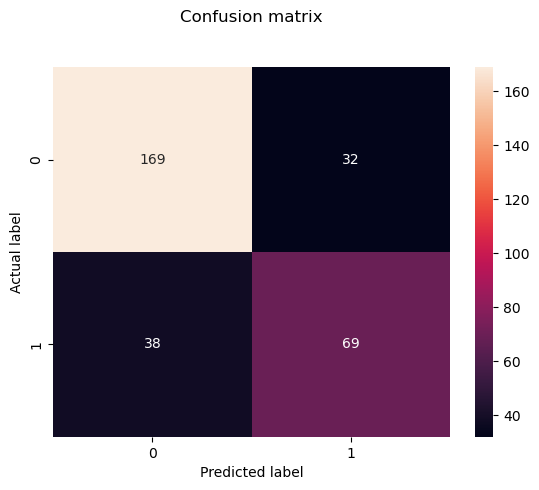

In [37]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h2 style="font-size: 24px;">XGBOOST</h2>

In [38]:
X_copy = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X_copy, y, test_size=0.4)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('mae: ',mae)
print('mse: ',mse)
print('accuracy: ',accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

mae:  0.262987012987013
mse:  0.262987012987013
accuracy:  0.737012987012987
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       187
           1       0.70      0.59      0.64       121

    accuracy                           0.74       308
   macro avg       0.73      0.71      0.72       308
weighted avg       0.73      0.74      0.73       308

Confusion Matrix:
[[156  31]
 [ 50  71]]


Text(0.5, 23.52222222222222, 'Predicted label')

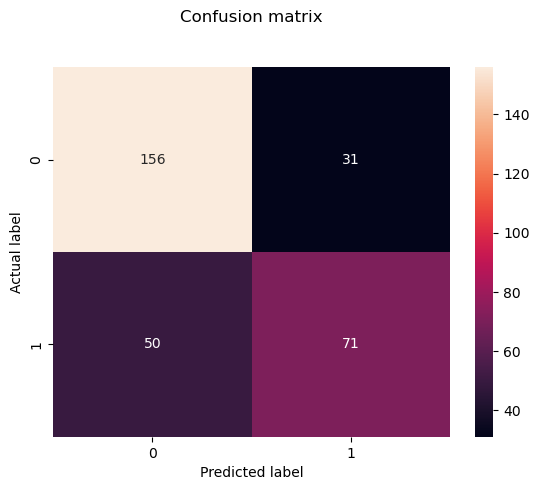

In [39]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h2 style="font-size: 24px;">KNN</h2>

In [44]:
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=15)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('mae: ',mae)
print('mse: ',mse)
print('accuracy: ',accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

mae:  0.22265625
mse:  0.22265625
accuracy:  0.77734375
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       175
           1       0.66      0.60      0.63        81

    accuracy                           0.78       256
   macro avg       0.74      0.73      0.74       256
weighted avg       0.77      0.78      0.77       256

Confusion Matrix:
[[150  25]
 [ 32  49]]


In [54]:
# x_custom = {}
# x_custom['pregnancies'] = 6
# x_custom['Glucose'] = 148
# x_custom['BloodPressue'] = 72
# x_custom['SkinThickness'] = 35
# x_custom['Insulin'] = 94
# x_custom['BMI'] = 33.6
# x_custom['DiabetesPedigreeFunction'] = .627
# x_custom = []
# x_custom = [[6,148,72,35,94,33.6,.627,50]]
# y_pred_custom = model.predict(x_custom)
# y_pred_custom

array([1])

Text(0.5, 23.52222222222222, 'Predicted label')

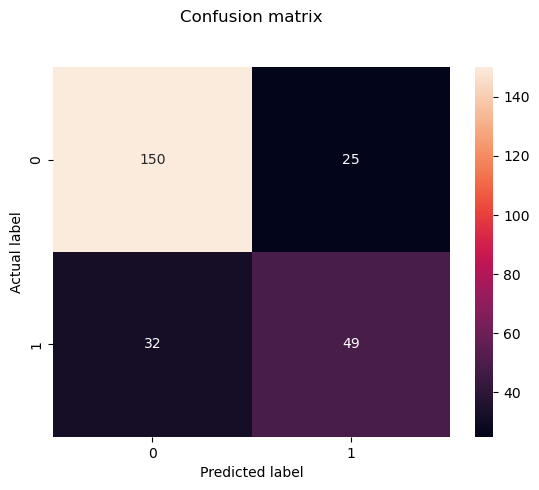

In [45]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')